# Feature Extraction and Price Prediction for Mobile Phones

In [5]:
# OBJECTIVE:
# Objective is to build a predictive model that can accurately estimate the price of a mobile phone based on its features.
# To achieve this, we'll perform a feature extraction analysis to identify the most influential features.

Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Data Exploration

In [2]:
df = pd.read_csv('C:\\Users\\Niti\\NEXTHIKES DIGICROME\\Project 4\\Processed_Flipdata - Processed_Flipdata.csv')

In [3]:
df.head(2)

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Price
0,0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
1,1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"


In [4]:
df.shape

(541, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     541 non-null    int64  
 1   Model          541 non-null    object 
 2   Colour         541 non-null    object 
 3   Memory         541 non-null    int64  
 4   RAM            541 non-null    int64  
 5   Battery_       541 non-null    int64  
 6   Rear Camera    541 non-null    object 
 7   Front Camera   541 non-null    object 
 8   AI Lens        541 non-null    int64  
 9   Mobile Height  541 non-null    float64
 10  Processor_     541 non-null    object 
 11  Price          541 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 50.8+ KB


# Convert object into integer

In [6]:
df['Price'] = df['Price'].str.replace(',', '').astype('Int64')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     541 non-null    int64  
 1   Model          541 non-null    object 
 2   Colour         541 non-null    object 
 3   Memory         541 non-null    int64  
 4   RAM            541 non-null    int64  
 5   Battery_       541 non-null    int64  
 6   Rear Camera    541 non-null    object 
 7   Front Camera   541 non-null    object 
 8   AI Lens        541 non-null    int64  
 9   Mobile Height  541 non-null    float64
 10  Processor_     541 non-null    object 
 11  Price          541 non-null    Int64  
dtypes: Int64(1), float64(1), int64(5), object(5)
memory usage: 51.4+ KB


We have removed (,) from Price column by replace method and converted it into integer

In [8]:
df.head(2)

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Price
0,0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299
1,1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299


In [9]:
df.describe()

,Unnamed: 0,Memory,RAM,Battery_,AI Lens,Mobile Height,Price
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.0
mean,289.711645,110.550832,5.397412,4871.587800,0.062847,16.431201,16228.375231
std,182.359185,60.600694,1.984923,780.148862,0.242911,2.523553,10793.588322
min,0.000000,16.000000,2.000000,800.000000,0.000000,4.500000,920.0
25%,135.000000,64.000000,4.000000,5000.000000,0.000000,16.510000,9290.0
50%,273.000000,128.000000,6.000000,5000.000000,0.000000,16.710000,13499.0
75%,434.000000,128.000000,8.000000,5000.000000,0.000000,16.940000,19280.0
max,642.000000,256.000000,8.000000,7000.000000,1.000000,41.940000,80999.0


# Data Preprocessing

# Missing Values

In [10]:
df.isnull().sum()

Unnamed: 0       0
Model            0
Colour           0
Memory           0
RAM              0
Battery_         0
Rear Camera      0
Front Camera     0
AI Lens          0
Mobile Height    0
Processor_       0
Price            0
dtype: int64

No missing values are there

# Feature Engineering

In [11]:
df['Model'].unique

<bound method Series.unique of 0            Infinix SMART 7
1            Infinix SMART 7
2               MOTOROLA G32
3                   POCO C50
4            Infinix HOT 30i
               ...          
536    SAMSUNG Galaxy S23 5G
537                 LAVA Z21
538           Tecno Spark 8T
539    SAMSUNG Galaxy A54 5G
540                 OPPO A77
Name: Model, Length: 541, dtype: object>

In [12]:
df['Colour'].unique

<bound method Series.unique of 0         Night Black
1          Azure Blue
2        Mineral Gray
3          Royal Blue
4            Marigold
            ...      
536             Cream
537              Cyan
538    Turquoise Cyan
539      Awesome Lime
540          Sky Blue
Name: Colour, Length: 541, dtype: object>

In [13]:
df['Processor_'].unique

<bound method Series.unique of 0       Unisoc Spreadtrum SC9863A1
1       Unisoc Spreadtrum SC9863A1
2          Qualcomm Snapdragon 680
3               Mediatek Helio A22
4                              G37
                  ...             
536    Qualcomm Snapdragon 8 Gen 2
537                      Octa Core
538             MediaTek Helio G35
539        Exynos 1380, Octa Core 
540             Mediatek Helio G35
Name: Processor_, Length: 541, dtype: object>

# Converting Categorical values into numerical format

# Ordinal Encoding on 'Model', 'Colour' and 'Processor' columns

In [14]:
from sklearn.preprocessing import OrdinalEncoder

In [15]:
columns_to_encode = ['Model', 'Colour', 'Processor_']

In [16]:
encoder = OrdinalEncoder()

In [17]:
df[columns_to_encode] = encoder.fit_transform(df[columns_to_encode])

In [18]:
df.head()

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Price
0,0,23.0,159.0,64,4,6000,13MP,5MP,1,16.76,113.0,7299
1,1,23.0,20.0,64,4,6000,13MP,5MP,1,16.76,113.0,7299
2,2,37.0,149.0,128,8,5000,50MP,16MP,0,16.64,75.0,11999
3,3,69.0,201.0,32,2,5000,8MP,5MP,0,16.56,56.0,5649
4,4,12.0,130.0,128,8,5000,50MP,5MP,1,16.76,14.0,8999


# Label Encoding of Model column

In [19]:
#label_encoder = LabelEncoder()
#df['Model_encoded'] = label_encoder.fit_transform(df['Model'])

In [20]:
df.head(2)

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Price
0,0,23.0,159.0,64,4,6000,13MP,5MP,1,16.76,113.0,7299
1,1,23.0,20.0,64,4,6000,13MP,5MP,1,16.76,113.0,7299


# Label Encoding of Colour column

In [21]:
#label_encoder = LabelEncoder()
#df['Colour_encoded'] = label_encoder.fit_transform(df['Colour'])

In [22]:
df.head(2)

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Price
0,0,23.0,159.0,64,4,6000,13MP,5MP,1,16.76,113.0,7299
1,1,23.0,20.0,64,4,6000,13MP,5MP,1,16.76,113.0,7299


# Label Encoding of Processor column

In [23]:
#label_encoder = LabelEncoder()
#df['Processor__encoded'] = label_encoder.fit_transform(df['Processor_'])

In [24]:
df.head(2)

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Price
0,0,23.0,159.0,64,4,6000,13MP,5MP,1,16.76,113.0,7299
1,1,23.0,20.0,64,4,6000,13MP,5MP,1,16.76,113.0,7299


Model, Colour and Processor columns have been changed into numerical

# Converting Rear Camera object into integer

In [25]:
df['RearCameraMP'] = df['Rear Camera'].apply(lambda x: int(x[:-2]))

In [26]:
df.head(2)

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Price,RearCameraMP
0,0,23.0,159.0,64,4,6000,13MP,5MP,1,16.76,113.0,7299,13
1,1,23.0,20.0,64,4,6000,13MP,5MP,1,16.76,113.0,7299,13


# Converting Front Camera object into integer

In [27]:
df['FrontCameraMP'] = df['Front Camera'].apply(lambda x: int(x[:-2]))

In [28]:
df.head(2)

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Price,RearCameraMP,FrontCameraMP
0,0,23.0,159.0,64,4,6000,13MP,5MP,1,16.76,113.0,7299,13,5
1,1,23.0,20.0,64,4,6000,13MP,5MP,1,16.76,113.0,7299,13,5


MP has been removed Front Camera and Rear Camera by applying lambda function so that its values can be in numeric terms

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     541 non-null    int64  
 1   Model          541 non-null    float64
 2   Colour         541 non-null    float64
 3   Memory         541 non-null    int64  
 4   RAM            541 non-null    int64  
 5   Battery_       541 non-null    int64  
 6   Rear Camera    541 non-null    object 
 7   Front Camera   541 non-null    object 
 8   AI Lens        541 non-null    int64  
 9   Mobile Height  541 non-null    float64
 10  Processor_     541 non-null    float64
 11  Price          541 non-null    Int64  
 12  RearCameraMP   541 non-null    int64  
 13  FrontCameraMP  541 non-null    int64  
dtypes: Int64(1), float64(4), int64(7), object(2)
memory usage: 59.8+ KB


# Feature Extraction

# Most Affecting Features on Price

In [30]:
df.corr(numeric_only = True)['Price'].sort_values(ascending = False)

Price            1.000000
Memory           0.566660
FrontCameraMP    0.532321
RAM              0.532024
RearCameraMP     0.410367
Unnamed: 0       0.333940
Mobile Height    0.176009
Colour           0.038895
Battery_        -0.034297
Processor_      -0.050244
Model           -0.075163
AI Lens         -0.153691
Name: Price, dtype: float64

# Memory affects Price the most


So we ll draw a ScatterPlot for Memory to calculate its Outliers

C:\Users\Niti\OneDrive\Documents\Python Scripts\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Niti\OneDrive\Documents\Python Scripts\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Memory', ylabel='Price'>

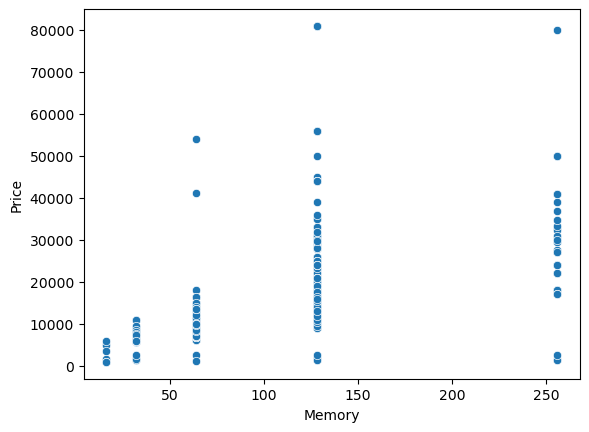

In [31]:
sns.scatterplot(data = df, x = 'Memory', y = 'Price')

# Outliers of Memory

In [32]:
df[(df['Memory'] < 250) & (df['Price'] > 70000)]

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Price,RearCameraMP,FrontCameraMP
493,576,2.0,144.0,128,6,4323,12MP,12MP,0,17.02,23.0,80999,12,12
520,614,2.0,193.0,128,3,4323,12MP,12MP,0,17.02,2.0,80999,12,12
525,621,2.0,230.0,128,4,4323,12MP,12MP,0,17.02,121.0,80999,12,12


# Front camera affects the Price after Memory

So we ll draw a ScatterPlot for Front Camera to calculate its Outliers

C:\Users\Niti\OneDrive\Documents\Python Scripts\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Niti\OneDrive\Documents\Python Scripts\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='FrontCameraMP', ylabel='Price'>

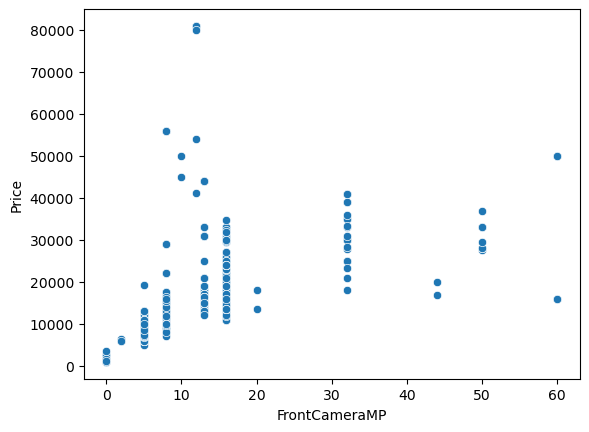

In [33]:
sns.scatterplot(data = df, x = 'FrontCameraMP', y = 'Price')

# Outliers of Front Camera

In [34]:
df[(df['FrontCameraMP'] > 50) | (df['Price'] > 70000)]

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Price,RearCameraMP,FrontCameraMP
293,297,28.0,95.0,128,8,4500,108MP,60MP,0,17.02,55.0,15999,108,60
294,298,28.0,54.0,128,8,4500,108MP,60MP,0,17.02,55.0,15999,108,60
400,427,35.0,107.0,256,4,4610,200MP,60MP,0,16.94,90.0,49999,200,60
489,569,35.0,232.0,256,6,4610,200MP,60MP,0,16.94,90.0,49999,200,60
493,576,2.0,144.0,128,6,4323,12MP,12MP,0,17.02,23.0,80999,12,12
520,614,2.0,193.0,128,3,4323,12MP,12MP,0,17.02,2.0,80999,12,12
525,621,2.0,230.0,128,4,4323,12MP,12MP,0,17.02,121.0,80999,12,12
536,637,118.0,49.0,256,8,3900,50MP,12MP,0,15.49,89.0,79999,50,12


# Outliers by quantile method

In [35]:
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3-Q1
outliers = df[(df['Price'] < (Q1 - 1.5*IQR)) | (df['Price'] > (Q3 + 1.5*IQR))]

In [36]:
outliers

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Price,RearCameraMP,FrontCameraMP
222,222,117.0,181.0,128,8,4500,50MP,10MP,0,16.76,88.0,49999,50,10
286,289,119.0,181.0,128,8,3300,12MP,10MP,0,17.02,97.0,44999,12,10
305,309,34.0,47.0,128,8,4400,50MP,32MP,0,16.64,96.0,34999,50,32
308,312,5.0,209.0,128,8,4300,64MP,13MP,0,15.49,108.0,43999,64,13
309,313,5.0,37.0,128,8,4300,64MP,13MP,0,15.49,108.0,43999,64,13
327,332,5.0,217.0,128,8,4300,64MP,13MP,0,15.49,108.0,43999,64,13
396,421,176.0,129.0,256,4,4600,50MP,50MP,0,17.22,48.0,36999,50,50
400,427,35.0,107.0,256,4,4610,200MP,60MP,0,16.94,90.0,49999,200,60
416,452,4.0,217.0,128,8,4270,50MP,8MP,0,16.00,16.0,55999,50,8
417,453,4.0,165.0,128,8,4270,50MP,8MP,0,16.00,16.0,55999,50,8


<Figure size 2400x600 with 0 Axes>

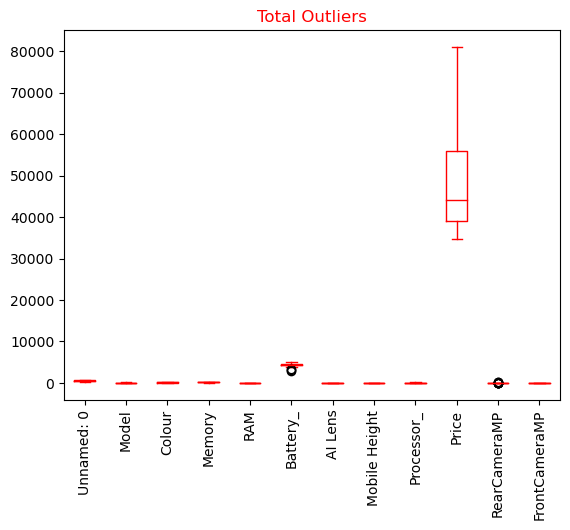

In [37]:
plt.figure(figsize = (12,3), dpi = 200)
outliers.plot(kind = 'box', color = 'red')
plt.xticks(rotation = 90)
plt.title('Total Outliers', color = 'red')
plt.show()

# Removing Outliers

In [38]:
df.drop(outliers.index)

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Price,RearCameraMP,FrontCameraMP
0,0,23.0,159.0,64,4,6000,13MP,5MP,1,16.76,113.0,7299,13,5
1,1,23.0,20.0,64,4,6000,13MP,5MP,1,16.76,113.0,7299,13,5
2,2,37.0,149.0,128,8,5000,50MP,16MP,0,16.64,75.0,11999,50,16
3,3,69.0,201.0,32,2,5000,8MP,5MP,0,16.56,56.0,5649,8,5
4,4,12.0,130.0,128,8,5000,50MP,5MP,1,16.76,14.0,8999,50,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,633,55.0,96.0,64,4,5000,50MP,8MP,0,16.55,68.0,9790,50,8
535,636,104.0,119.0,64,3,5000,13MP,5MP,0,16.51,65.0,9999,13,5
537,638,32.0,52.0,32,2,3100,5MP,2MP,0,12.70,68.0,5998,5,2
538,639,123.0,259.0,64,4,5000,50MP,8MP,0,16.76,35.0,9990,50,8


In [39]:
df.head(2)

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Price,RearCameraMP,FrontCameraMP
0,0,23.0,159.0,64,4,6000,13MP,5MP,1,16.76,113.0,7299,13,5
1,1,23.0,20.0,64,4,6000,13MP,5MP,1,16.76,113.0,7299,13,5


All Outliers have been removed

# Dropping unnecessary columns

In [40]:
df.drop(['Unnamed: 0','Rear Camera', 'Front Camera'], axis = 1, inplace = True)

In [41]:
df.head(2)

,Model,Colour,Memory,RAM,Battery_,AI Lens,Mobile Height,Processor_,Price,RearCameraMP,FrontCameraMP
0,23.0,159.0,64,4,6000,1,16.76,113.0,7299,13,5
1,23.0,20.0,64,4,6000,1,16.76,113.0,7299,13,5


# Transferring this cleaned data into csv format and saving for Tableau

In [42]:
df.to_csv('data_for_tableau.csv')

# Dimensionality Reduction

# Feature Selection using Filter Method

In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, chi2

# Load the data
X = df.drop('Price', axis = 1)
y = df.Price

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply a filter method (e.g., chi-squared) for feature selection
# Select the top k features
k_best = SelectKBest(chi2, k=2)
X_train_selected = k_best.fit_transform(X_train, y_train)
X_test_selected = k_best.transform(X_test)

# Train a classifier on the selected features
clf = RandomForestClassifier()
clf.fit(X_train_selected, y_train)

# Evaluate the classifier on the test set
accuracy = clf.score(X_test_selected, y_test)
print(f"Accuracy with selected features: {accuracy}")


Accuracy with selected features: 0.1926605504587156


# Feature Extraction using PCA

In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier

# Load the dataset
X = df.drop('Price', axis = 1)
y = df.Price

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply PCA for feature extraction
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train a classifier on the extracted features
clf = RandomForestClassifier()
clf.fit(X_train_pca, y_train)

# Evaluate the classifier on the test set
accuracy = clf.score(X_test_pca, y_test)
print(f"Accuracy with PCA components: {accuracy}")


Accuracy with PCA components: 0.11926605504587157


# Visualisation

# Correlation Analysis

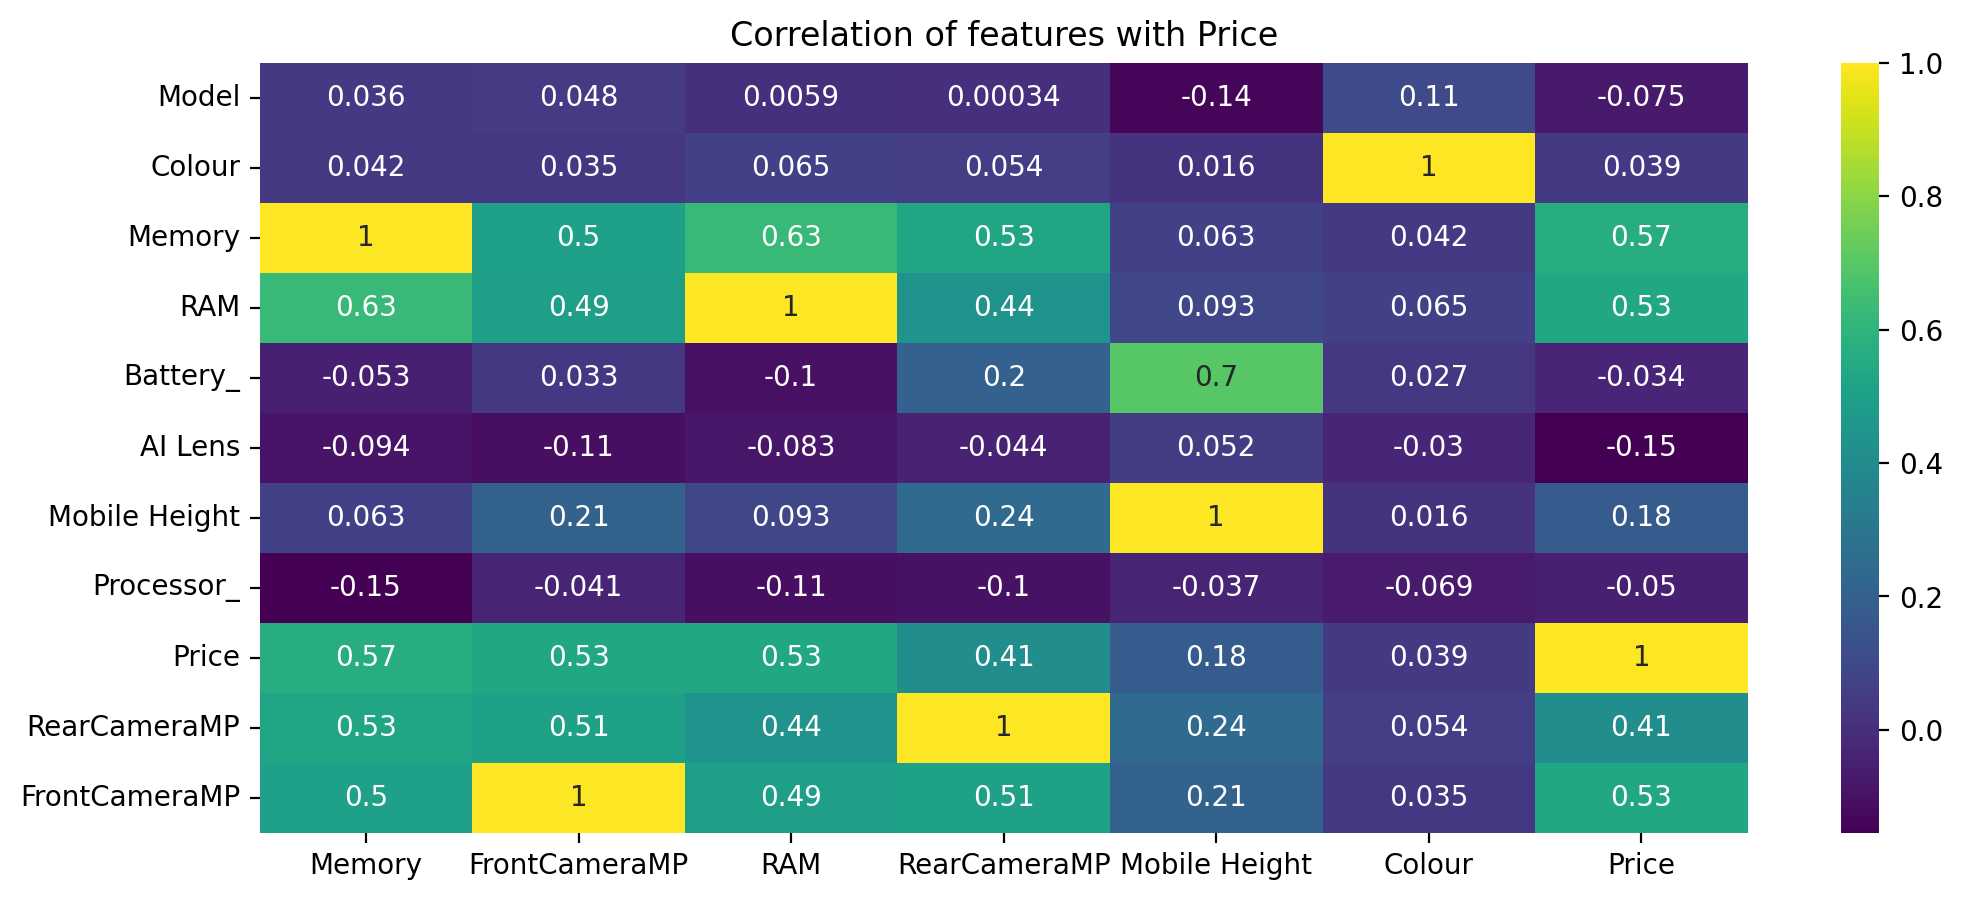

In [50]:
plt.figure(figsize = (12,5), dpi = 200)
sns.heatmap(df.corr(numeric_only = True)[['Memory', 'FrontCameraMP','RAM', 'RearCameraMP', 'Mobile Height', 'Colour','Price']],
            annot = True, cmap = 'viridis')
plt.title('Correlation of features with Price')
plt.show()

In [51]:
# Analysis:
# Memory, Front Camera and RAM increases the Price and have positive correlation

# Countplot of RAM

C:\Users\Niti\OneDrive\Documents\Python Scripts\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Niti\OneDrive\Documents\Python Scripts\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Niti\OneDrive\Documents\Python Scripts\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


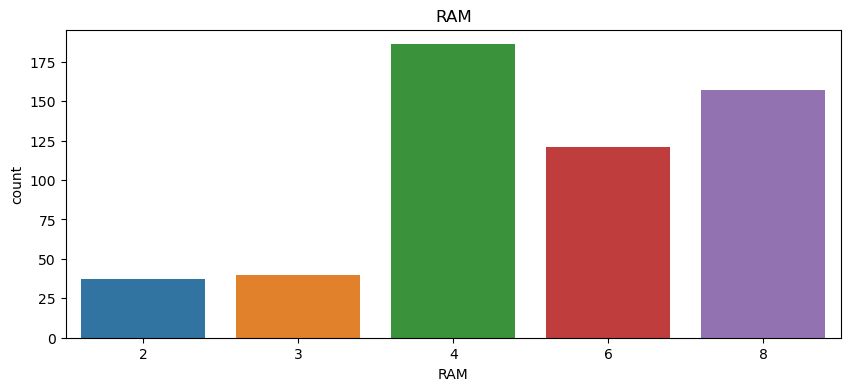

In [52]:
plt.figure(figsize = (10,4), dpi = 100)
sns.countplot(data = df, x = 'RAM')
plt.title('RAM')
plt.show()

In [53]:
# RAM 4 is highest in demand followed by RAM 8 and RAM 6

# BoxPlot of Memory

C:\Users\Niti\OneDrive\Documents\Python Scripts\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Niti\OneDrive\Documents\Python Scripts\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Niti\OneDrive\Documents\Python Scripts\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


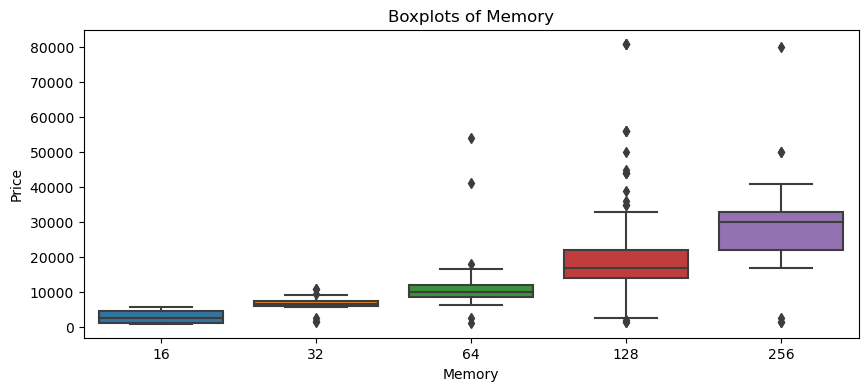

In [54]:
plt.figure(figsize = (10,4), dpi = 100)
sns.boxplot(data = df, x = 'Memory', y = 'Price')
plt.title('Boxplots of Memory')
plt.show()

In [55]:
# Boxplots of Memory shows that 256 GB Memory is used maximum and increases the Prices the most, followed by 128GB. 

# Jointplot of Front Camera

C:\Users\Niti\OneDrive\Documents\Python Scripts\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Niti\OneDrive\Documents\Python Scripts\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Niti\OneDrive\Documents\Python Scripts\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Niti\OneDrive\Documents\Python Scripts\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed i

<Figure size 1000x400 with 0 Axes>

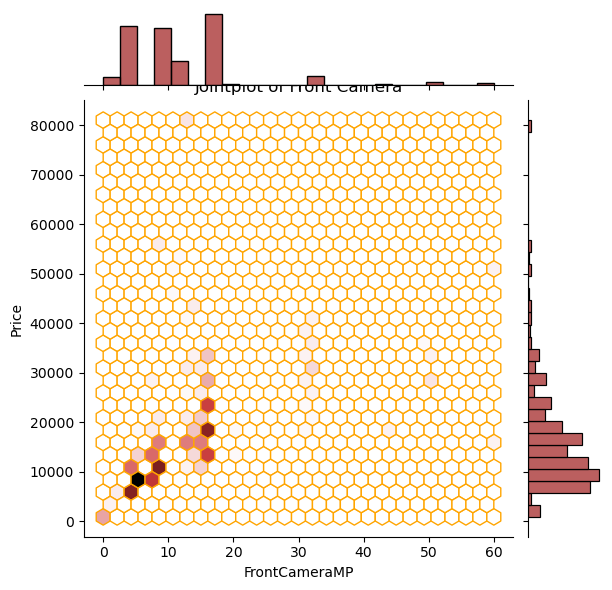

In [56]:
plt.figure(figsize = (10,4), dpi = 100)
sns.jointplot(data = df, x = 'FrontCameraMP', y = 'Price', kind = 'hex', color = 'brown', edgecolor = 'orange')
plt.title('Jointplot of Front Camera')
plt.show()

In [57]:
# Analysis:
# This chart clearly shows that Front Camera of 16 MP is highest in demand and therefore it affects the price

# Feature Selection

In [58]:
X = df.drop('Price', axis = 1)

In [59]:
X.head(2)

,Model,Colour,Memory,RAM,Battery_,AI Lens,Mobile Height,Processor_,RearCameraMP,FrontCameraMP
0,23.0,159.0,64,4,6000,1,16.76,113.0,13,5
1,23.0,20.0,64,4,6000,1,16.76,113.0,13,5


In [60]:
y = df.Price

In [61]:
y.head(2)

0    7299
1    7299
Name: Price, dtype: Int64

# Train Test data

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=101)

In [63]:
print(X_train.shape)

(432, 10)


# Linear Regression

# Create and train the model

In [64]:
linearmodel = LinearRegression()

In [65]:
linearmodel.fit(X_train, y_train)

LinearRegression()

In [66]:
linearmodel.score(X_test, y_test)

0.4372906429248241

In [67]:
linearmodel.coef_

array([-3.42291937e+01,  1.55173987e-01,  6.29803806e+01,  9.61978453e+02,
       -1.92342128e+00, -6.39483934e+03,  5.11979333e+02,  4.92933927e+00,
       -5.60285856e+00,  2.96564534e+02])

# Predict the model

In [68]:
y_pred = linearmodel.predict(X_test)

In [69]:
y_pred

array([29972.1266259 ,  7620.89393753, 13116.52720238, 29992.83204407,
       32140.48706058,  7803.915026  , 12040.41286116, 22036.31835686,
       30531.27709708, 17880.65126612, 15361.51379931,  6779.1292407 ,
       18580.93299177, 27811.72941009, 18007.45151558, 13446.3605245 ,
       28496.05125495, 11296.87504414, 26780.10407477, 28866.20915362,
       15225.84928065, 37353.34813573, 11305.09926546, 26127.42699728,
        5558.63775537, 20098.23548386,  9983.87093797,  5838.16620391,
       20577.51801173, 18203.93154814,  5042.77621779, 17656.2382484 ,
        7875.23185081, 26966.85902435, 16856.22334374, 23256.52322427,
        5597.64695201, 19656.54533556, 18121.53889019, 12929.16202129,
       11818.31804816, 14667.87372491, 22058.30603956,  8839.87915393,
       13966.36034796, 12025.77493616, 13350.87437418,  6349.68502136,
       18757.21057271, 16006.48800504, 22329.13347494, 11836.25123931,
       23711.39358142, 20045.49579717,  9091.03016019, 18706.28747432,
      

We ll draw a ScatterPlot for True and Predicted values

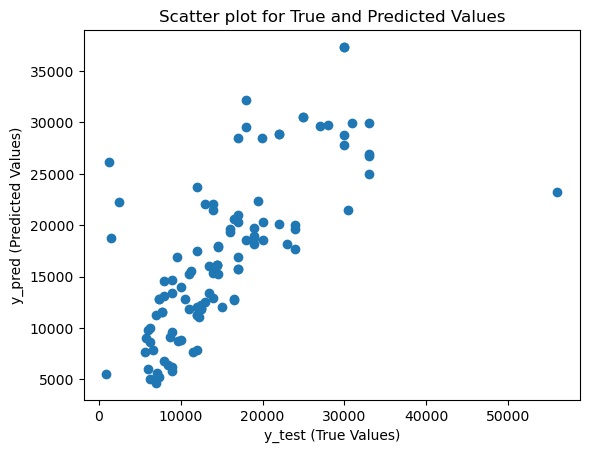

In [70]:
plt.scatter(y_test, y_pred)
plt.xlabel('y_test (True Values)')
plt.ylabel('y_pred (Predicted Values)')
plt.title('Scatter plot for True and Predicted Values')
plt.show()

# Model Evaluation

In [71]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [72]:
df['Price'].mean()

16228.375231053604

C:\Users\Niti\OneDrive\Documents\Python Scripts\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Niti\OneDrive\Documents\Python Scripts\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


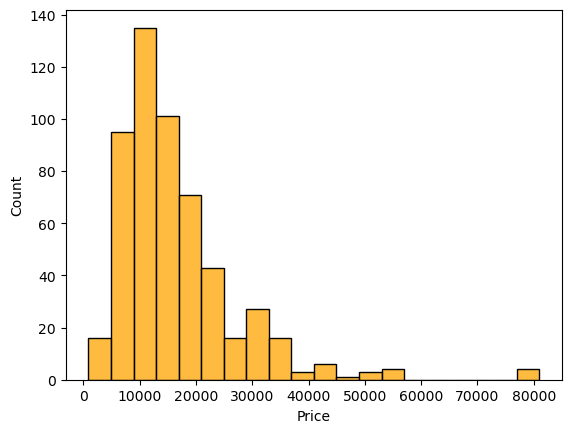

In [73]:
sns.histplot(data = df, x = 'Price', bins = 20, color = 'orange')
plt.show()

In [74]:
# Histplot shows the maximum number of Mobiles cost between 8000 to 13000.

In [75]:
mean_absolute_error(y_test, y_pred)

4226.116213557401

In [76]:
mean_squared_error(y_test, y_pred)

41704687.58238535

In [77]:
# Root mean squared error
np.sqrt(mean_squared_error(y_test, y_pred))

6457.916659603571

In [78]:
metrics.explained_variance_score(y_test, y_pred)

0.4750768536561937

# Errors

In [79]:
test_residuals = y_test - y_pred

In [82]:
test_residuals

225     3026.873374
18     -1971.893938
48     -5117.527202
494      881.167956
348   -14141.487061
           ...     
186     1262.997565
170       129.40711
147       33.521034
65      -1614.15758
56       446.249752
Name: Price, Length: 109, dtype: Float64

Now we ll draw a ScatterPlot for all these errors

C:\Users\Niti\OneDrive\Documents\Python Scripts\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Niti\OneDrive\Documents\Python Scripts\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<function matplotlib.pyplot.show(close=None, block=None)>

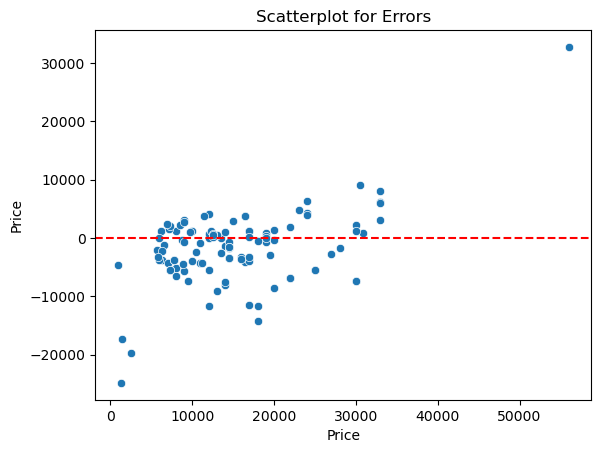

In [83]:
sns.scatterplot(x = y_test, y = test_residuals)
plt.axhline(y = 0, color = 'r', ls = '--')
plt.title('Scatterplot for Errors')
plt.show

# NO clear line or curve..so we should not use LinearRegression

C:\Users\Niti\AppData\Local\Temp\ipykernel_2916\1644359456.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test_residuals, bins = 25, kde = True, color = 'green')
C:\Users\Niti\OneDrive\Documents\Python Scripts\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Niti\OneDrive\Documents\Python Scripts\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values 

<Axes: xlabel='Price', ylabel='Density'>

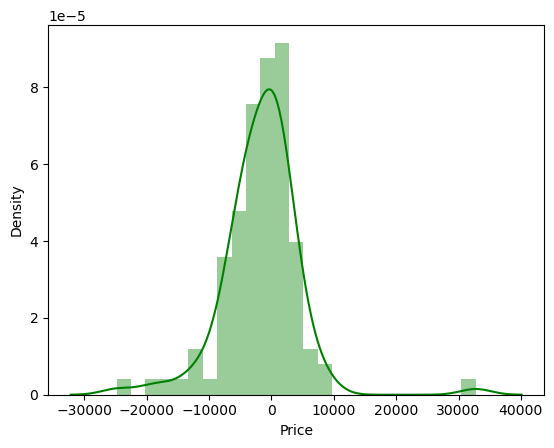

In [84]:
sns.distplot(test_residuals, bins = 25, kde = True, color = 'green')

In [85]:
# Distplot is making a proper curve which will help in making decision of using this algorithm.

# Feature Importance Analysis

In [86]:
X.columns

Index(['Model', 'Colour', 'Memory', 'RAM', 'Battery_', 'AI Lens',
       'Mobile Height', 'Processor_', 'RearCameraMP', 'FrontCameraMP'],
      dtype='object')

In [87]:
Coeff_analysis = pd.DataFrame(linearmodel.coef_, X.columns, columns = ['Coeff'])

In [88]:
Coeff_analysis.sort_values('Coeff', ascending = False)

,Coeff
RAM,961.978453
Mobile Height,511.979333
FrontCameraMP,296.564534
Memory,62.980381
Processor_,4.929339
Colour,0.155174
Battery_,-1.923421
RearCameraMP,-5.602859
Model,-34.229194
AI Lens,-6394.839340


RAM is the most relevant feature followed by Mobile Height and Front Camera

# AI Lens, Model, Rear Camera and Battery have negative impact on Price

# RAM increases the Price the most, followed by Mobile Height, Front Camera, Memory, Processor and Colour 

<Axes: >

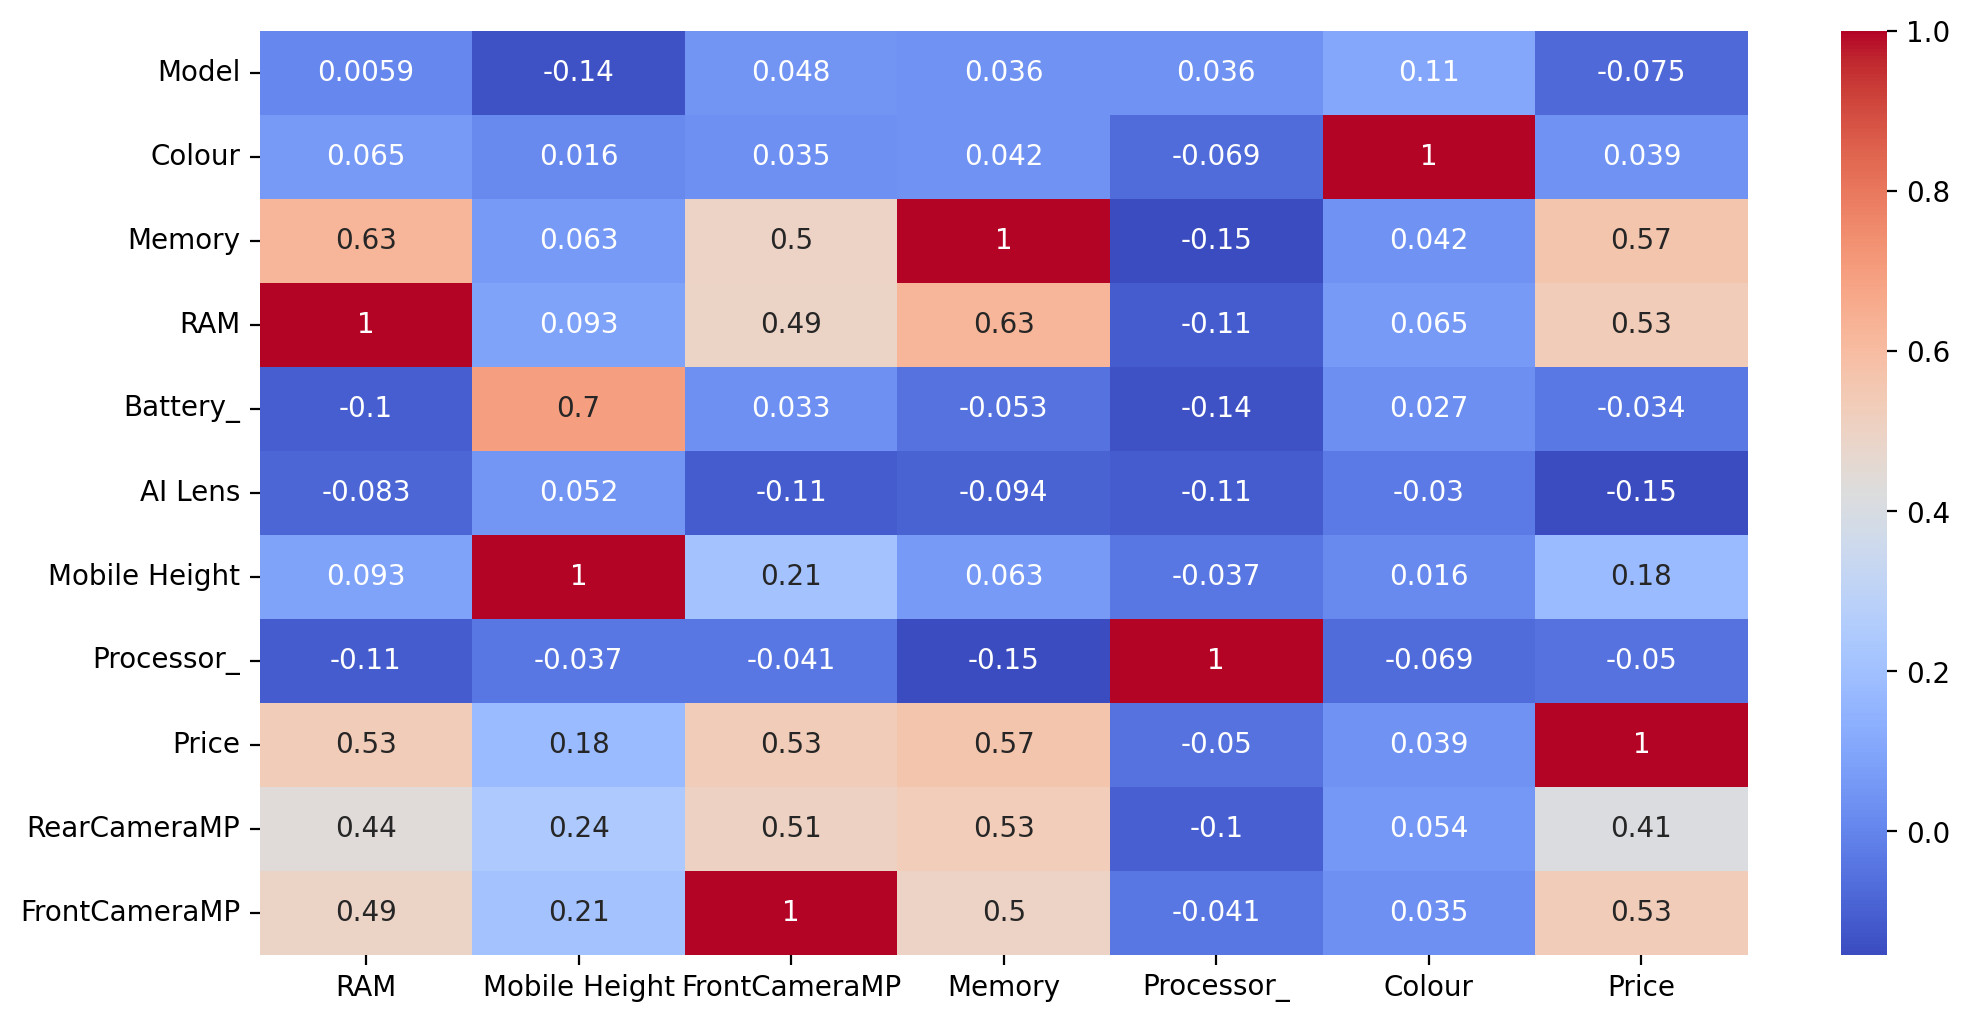

In [89]:
plt.figure(figsize = (12,6),dpi = 200)
sns.heatmap(df.corr()[['RAM','Mobile Height','FrontCameraMP','Memory','Processor_','Colour','Price']], annot = True,
           cmap = 'coolwarm')

Linear Regression Algorithm is not that much effective in this data to extract the relevant features. So we should try some other algorithms

# Decision Trees

In [90]:
from sklearn.tree import DecisionTreeClassifier

In [91]:
dtmodel = DecisionTreeClassifier()

In [92]:
dtmodel.fit(X_train, y_train)

DecisionTreeClassifier()

In [93]:
dtmodel.score(X_test, y_test)

0.5871559633027523

In [94]:
base_pred = dtmodel.predict(X_test)

In [95]:
base_pred

array([16990.,  6299.,  7999., 27540., 17999.,  7961.,  9790., 30385.,
       34999., 13999., 11248.,  7999., 19979., 29999., 14499., 13499.,
       17999., 11999., 32999., 21999., 10999., 29999., 11999.,  1299.,
         920., 21999.,  5999.,  8999., 16499., 18999.,  6199., 23999.,
        6599., 20999.,  9499., 55999.,  7245., 23999., 22999., 10999.,
        9999.,  8999., 13999.,  9999.,  7999., 14999.,  7999.,  8499.,
       13999., 15499., 19499., 11970., 11999., 23999.,  8749., 18999.,
       26999., 17999., 32999.,  6999.,  5999., 12999.,  7749., 32999.,
       13999.,  6599.,  9699., 10499., 14999., 12499.,  7999.,  7299.,
        9349.,  5999., 24999., 14499., 38999.,  8069., 29418., 12499.,
        7999.,  7999.,  7999., 34999., 16999., 16999., 14490., 16499.,
        7749., 11999., 14490., 16499., 12499., 19999.,  5990., 17999.,
       15999., 40999.,  8999., 29499., 29999.,  9699., 16499., 15999.,
       12999., 16999., 18999., 14490., 12499.])

In [96]:
from sklearn.metrics import classification_report, confusion_matrix

In [97]:
print(classification_report(y_test, base_pred))

              precision    recall  f1-score   support

       920.0       1.00      1.00      1.00         1
      1299.0       1.00      1.00      1.00         1
      1449.0       0.00      0.00      0.00         1
      2499.0       0.00      0.00      0.00         1
      5649.0       0.00      0.00      0.00         1
      5799.0       0.00      0.00      0.00         1
      5990.0       0.00      0.00      0.00         0
      5998.0       0.00      0.00      0.00         1
      5999.0       0.00      0.00      0.00         1
      6199.0       1.00      1.00      1.00         1
      6299.0       0.00      0.00      0.00         2
      6599.0       0.50      1.00      0.67         1
      6978.0       0.00      0.00      0.00         1
      6999.0       1.00      1.00      1.00         1
      7115.0       0.00      0.00      0.00         1
      7245.0       0.00      0.00      0.00         0
      7299.0       1.00      0.33      0.50         3
      7749.0       1.00    

C:\Users\Niti\OneDrive\Documents\Python Scripts\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Niti\OneDrive\Documents\Python Scripts\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Niti\OneDrive\Documents\Python Scripts\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(res

Accuracy is 0.59

In [98]:
print(confusion_matrix(y_test, base_pred))

[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]]


In [99]:
dtmodel.feature_importances_

array([0.22147454, 0.12972357, 0.03004472, 0.13499945, 0.03402198,
       0.01952823, 0.11666721, 0.16760744, 0.06495043, 0.08098241])

In [100]:
X.columns

Index(['Model', 'Colour', 'Memory', 'RAM', 'Battery_', 'AI Lens',
       'Mobile Height', 'Processor_', 'RearCameraMP', 'FrontCameraMP'],
      dtype='object')

In [101]:
pd.DataFrame(index = X.columns, data = dtmodel.feature_importances_, 
             columns = ['Feature Importance']).sort_values('Feature Importance', ascending = False)

,Feature Importance
Model,0.221475
Processor_,0.167607
RAM,0.134999
Colour,0.129724
Mobile Height,0.116667
FrontCameraMP,0.080982
RearCameraMP,0.064950
Battery_,0.034022
Memory,0.030045
AI Lens,0.019528


# This is the list of features which affect the Price the most
Model, Processor, RAM, Mobile Height, Colour, Front Camera, Rear Camera, Battery, Memory, AI Lens

Text(0.5, 1.0, 'Correlation Analysis of most relevant features')

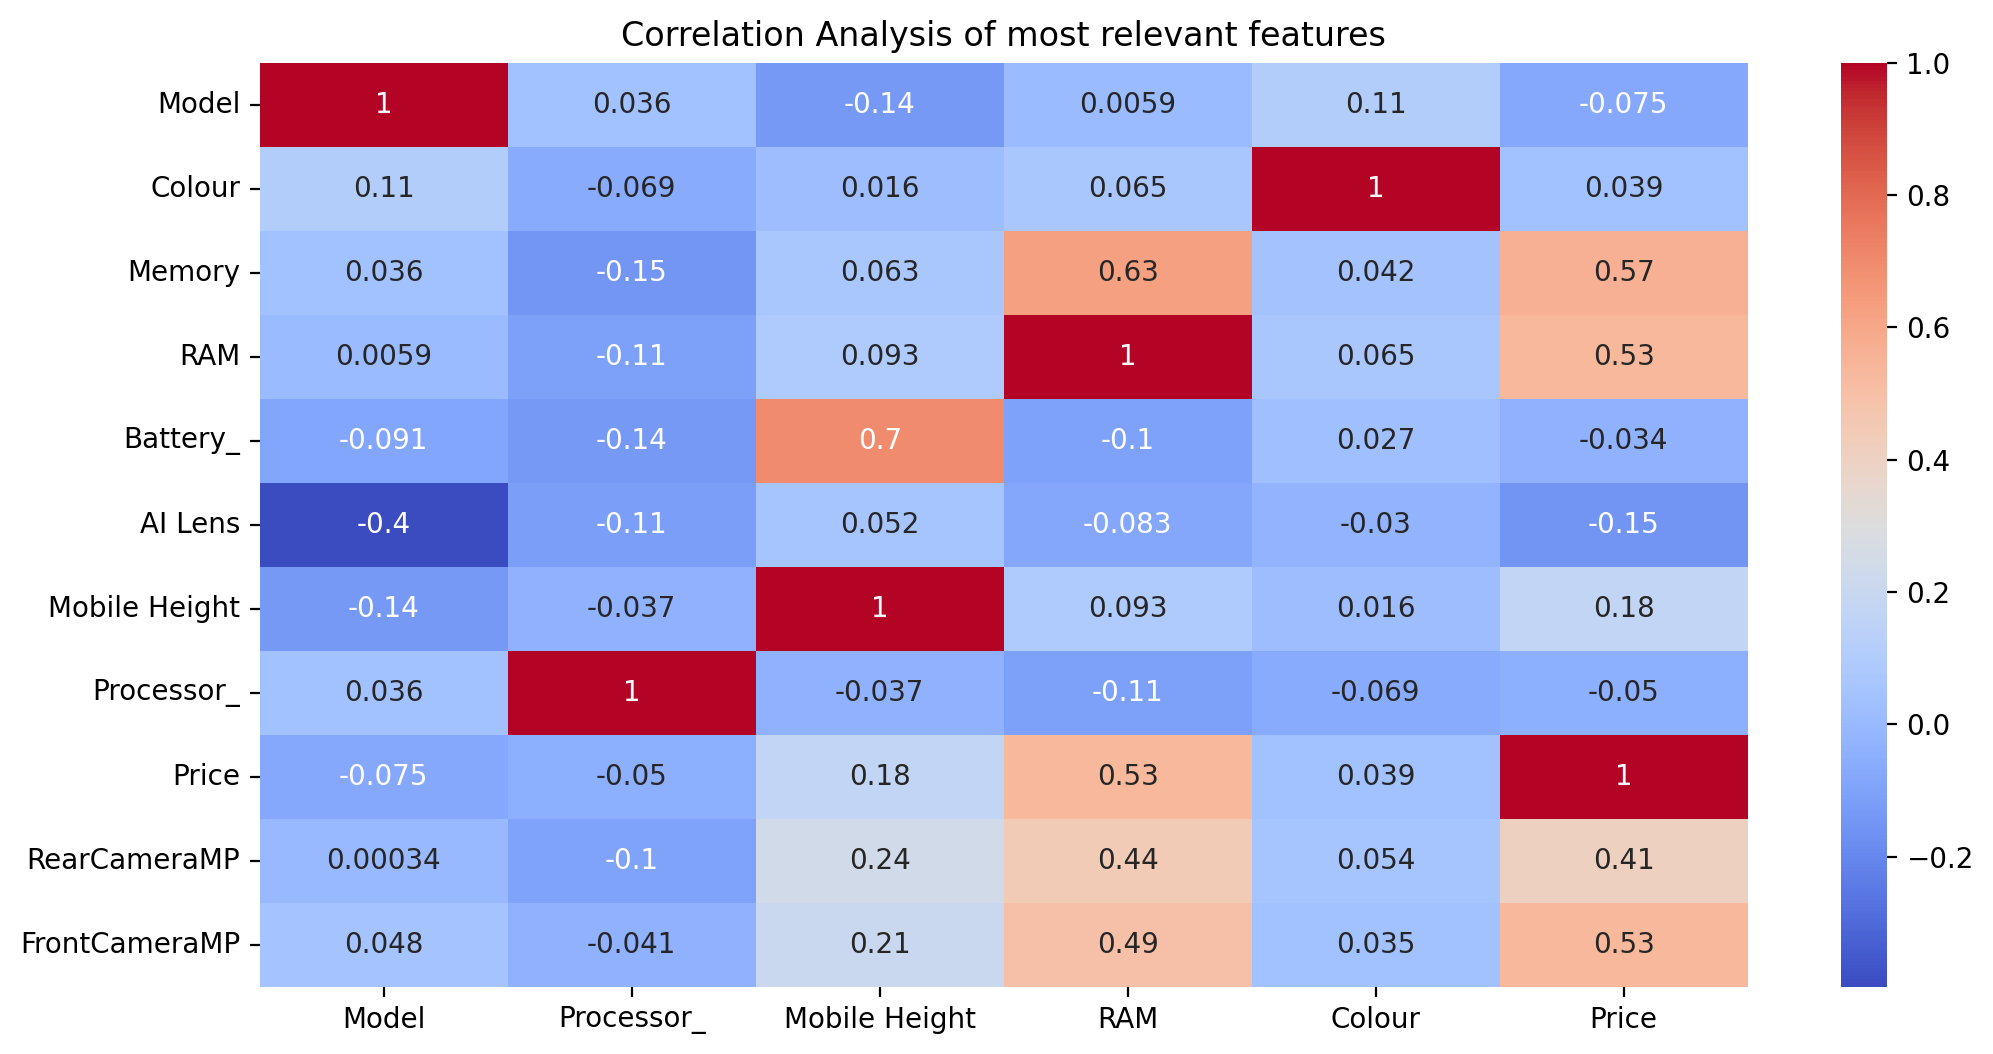

In [102]:
plt.figure(figsize = (12,6),dpi = 200)
sns.heatmap(df.corr()[['Model','Processor_','Mobile Height','RAM', 'Colour','Price']], annot = True,cmap = 'coolwarm')
plt.title('Correlation Analysis of most relevant features')

In [103]:
from sklearn.tree import plot_tree

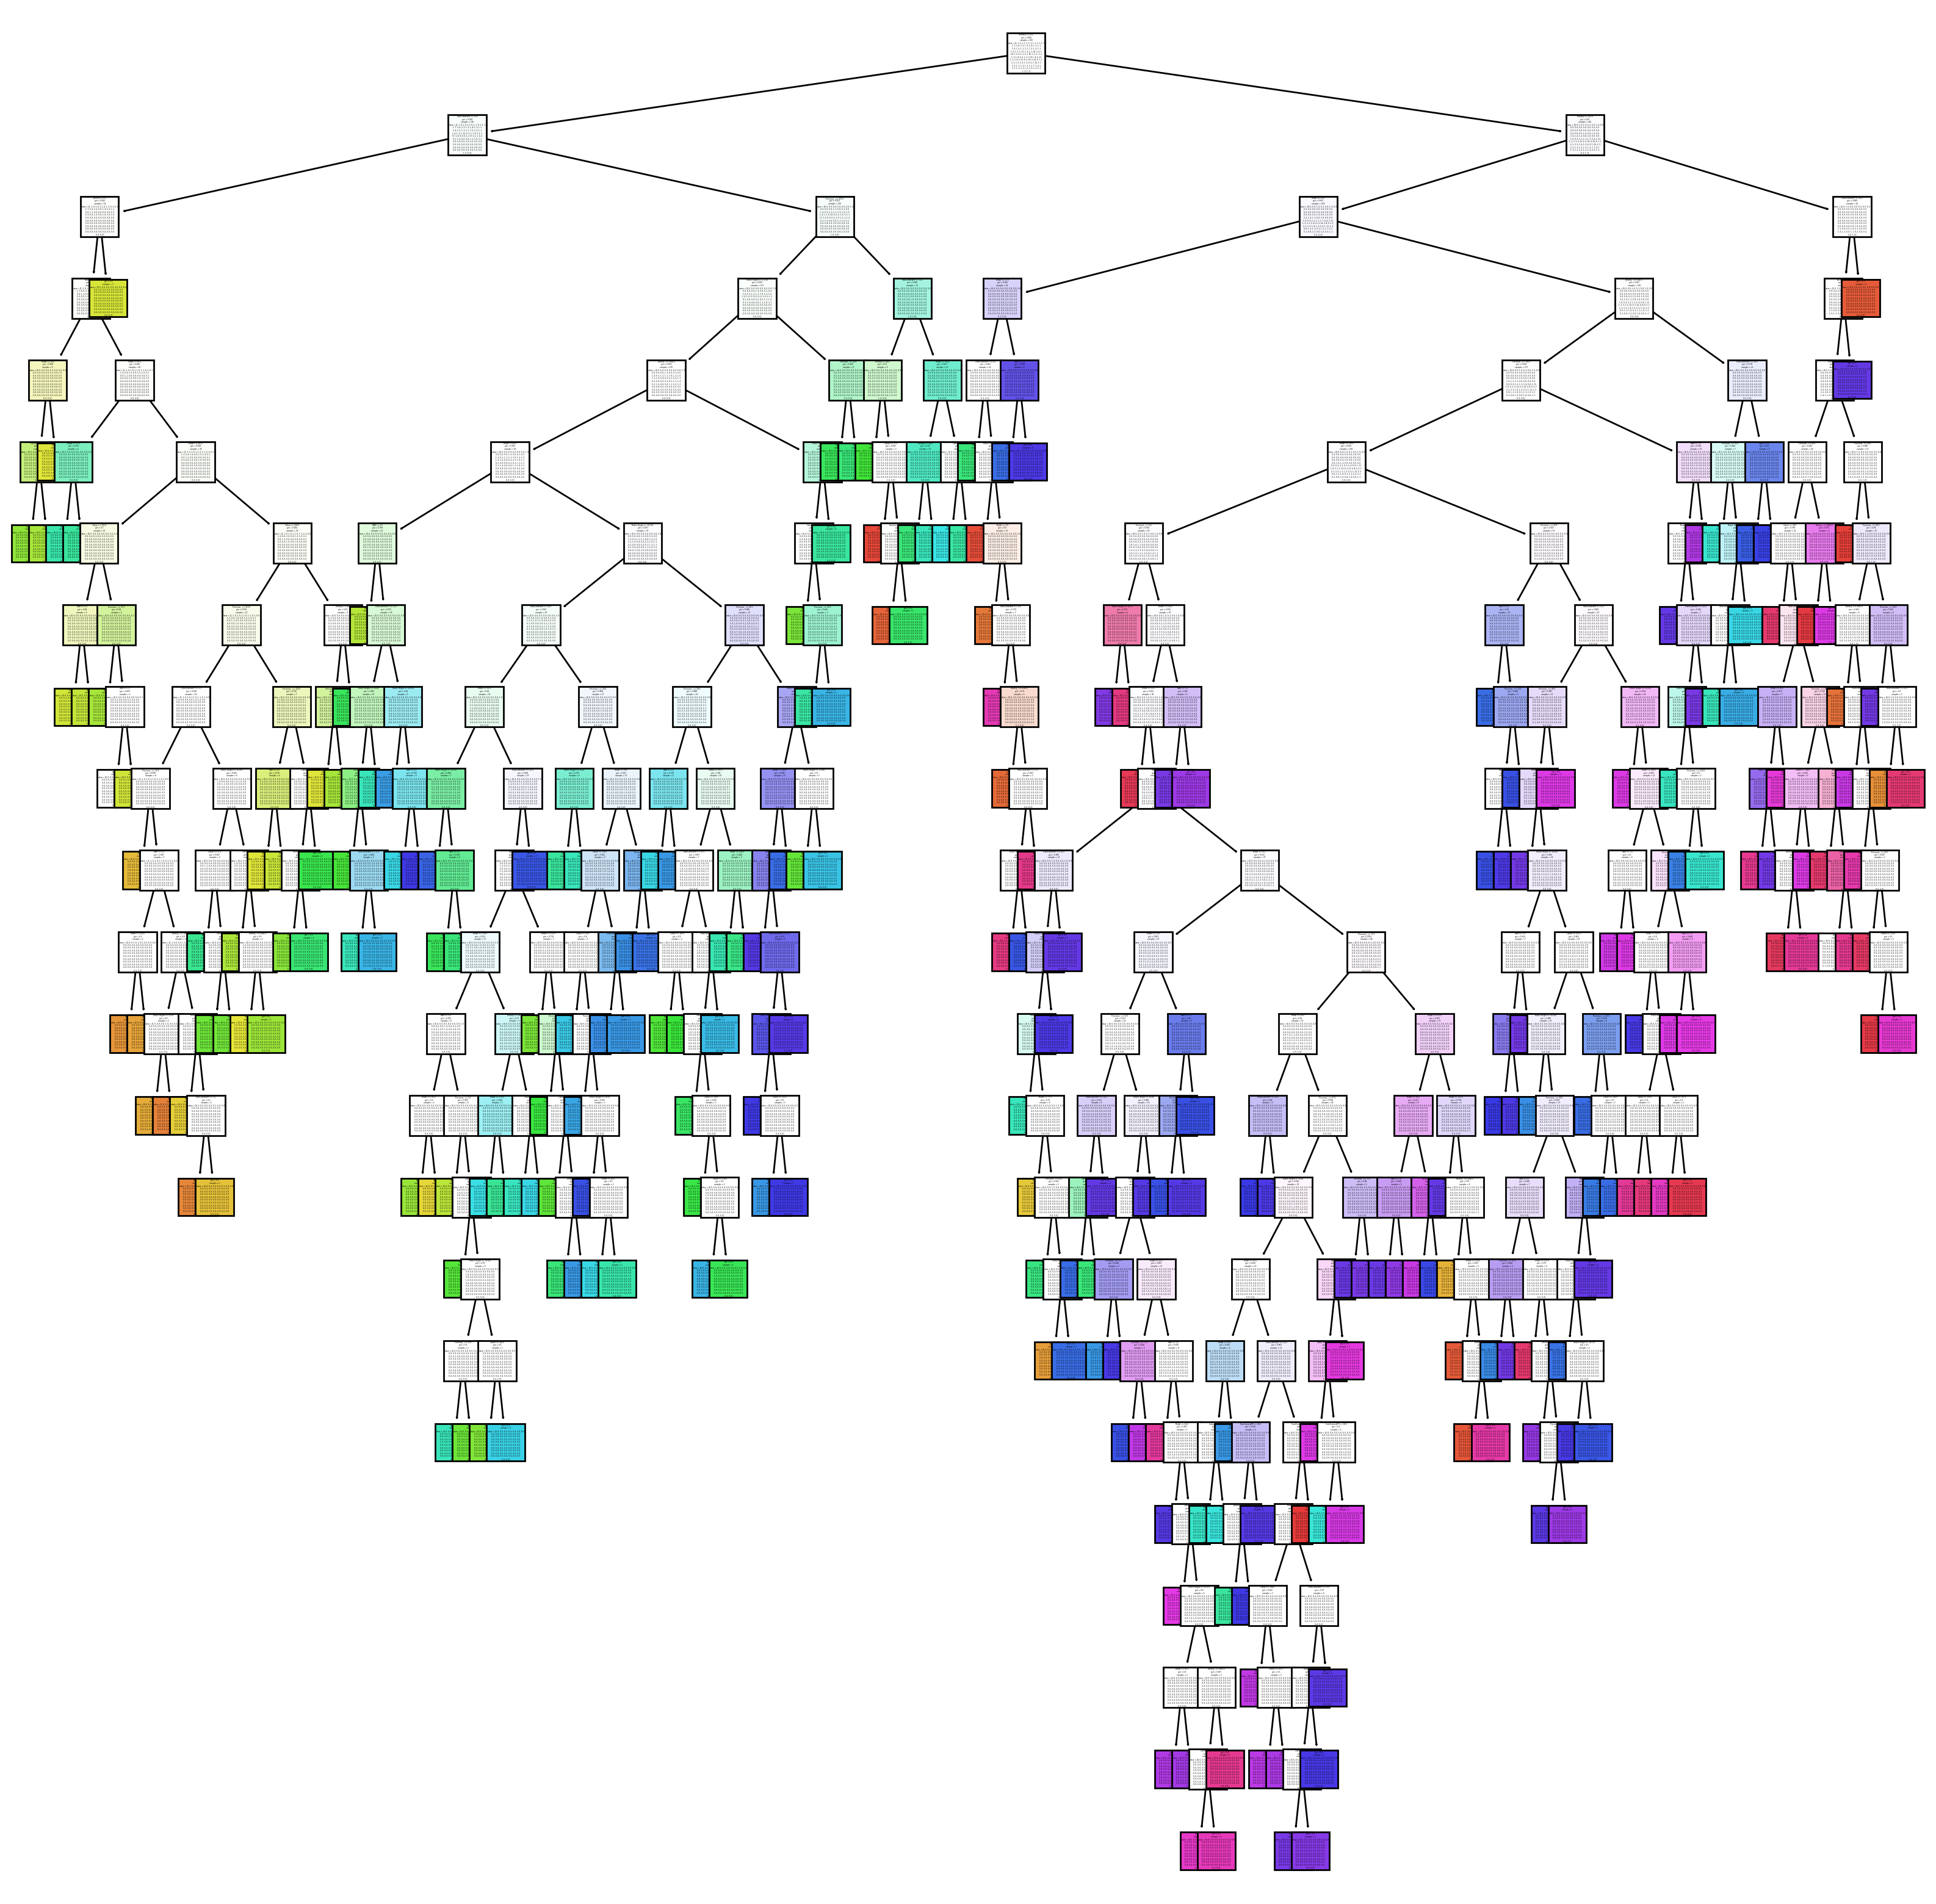

In [101]:
plt.figure(figsize = (20,20), dpi = 200)
plot_tree(dtmodel, feature_names = X.columns, filled = True);

In [104]:
def report_model(dtmodel):
    base_pred = dtmodel.predict(X_test)
    print(classification_report(y_test, base_pred))
    print('\n')
    

In [105]:
report_model(dtmodel)

              precision    recall  f1-score   support

       920.0       1.00      1.00      1.00         1
      1299.0       1.00      1.00      1.00         1
      1449.0       0.00      0.00      0.00         1
      2499.0       0.00      0.00      0.00         1
      5649.0       0.00      0.00      0.00         1
      5799.0       0.00      0.00      0.00         1
      5990.0       0.00      0.00      0.00         0
      5998.0       0.00      0.00      0.00         1
      5999.0       0.00      0.00      0.00         1
      6199.0       1.00      1.00      1.00         1
      6299.0       0.00      0.00      0.00         2
      6599.0       0.50      1.00      0.67         1
      6978.0       0.00      0.00      0.00         1
      6999.0       1.00      1.00      1.00         1
      7115.0       0.00      0.00      0.00         1
      7245.0       0.00      0.00      0.00         0
      7299.0       1.00      0.33      0.50         3
      7749.0       1.00    

C:\Users\Niti\OneDrive\Documents\Python Scripts\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Niti\OneDrive\Documents\Python Scripts\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Niti\OneDrive\Documents\Python Scripts\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(res

Here the accuracy is 0.59

In [106]:
pruned_tree = DecisionTreeClassifier(max_depth = 2)

In [107]:
pruned_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [108]:
report_model(pruned_tree)

              precision    recall  f1-score   support

       920.0       0.00      0.00      0.00         1
      1299.0       0.00      0.00      0.00         1
      1449.0       0.00      0.00      0.00         1
      2499.0       0.00      0.00      0.00         1
      5649.0       0.00      0.00      0.00         1
      5799.0       0.00      0.00      0.00         1
      5998.0       0.00      0.00      0.00         1
      5999.0       0.00      0.00      0.00         1
      6199.0       0.00      0.00      0.00         1
      6299.0       0.00      0.00      0.00         2
      6599.0       0.00      0.00      0.00         1
      6978.0       0.00      0.00      0.00         1
      6999.0       0.08      1.00      0.15         1
      7115.0       0.00      0.00      0.00         1
      7299.0       0.00      0.00      0.00         3
      7749.0       0.00      0.00      0.00         2
      7999.0       0.00      0.00      0.00         3
      8499.0       0.00    

C:\Users\Niti\OneDrive\Documents\Python Scripts\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Niti\OneDrive\Documents\Python Scripts\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Niti\OneDrive\Documents\Python Scripts\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

Here the accuracy is 0.06

In [109]:
max_leaf_tree = DecisionTreeClassifier(max_leaf_nodes = 3)

In [110]:
max_leaf_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=3)

In [111]:
report_model(max_leaf_tree)

              precision    recall  f1-score   support

       920.0       0.00      0.00      0.00         1
      1299.0       0.00      0.00      0.00         1
      1449.0       0.00      0.00      0.00         1
      2499.0       0.00      0.00      0.00         1
      5649.0       0.00      0.00      0.00         1
      5799.0       0.00      0.00      0.00         1
      5998.0       0.00      0.00      0.00         1
      5999.0       0.00      0.00      0.00         1
      6199.0       0.00      0.00      0.00         1
      6299.0       0.00      0.00      0.00         2
      6599.0       0.00      0.00      0.00         1
      6978.0       0.00      0.00      0.00         1
      6999.0       0.08      1.00      0.15         1
      7115.0       0.00      0.00      0.00         1
      7299.0       0.00      0.00      0.00         3
      7749.0       0.00      0.00      0.00         2
      7999.0       0.00      0.00      0.00         3
      8499.0       0.00    

C:\Users\Niti\OneDrive\Documents\Python Scripts\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Niti\OneDrive\Documents\Python Scripts\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Niti\OneDrive\Documents\Python Scripts\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

Here the accuracy is 0.04

In [112]:
entropy_tree = DecisionTreeClassifier(criterion='entropy')

In [113]:
entropy_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [114]:
report_model(entropy_tree)

              precision    recall  f1-score   support

       920.0       1.00      1.00      1.00         1
      1299.0       1.00      1.00      1.00         1
      1422.0       0.00      0.00      0.00         0
      1449.0       0.00      0.00      0.00         1
      2499.0       0.00      0.00      0.00         1
      2615.0       0.00      0.00      0.00         0
      5649.0       1.00      1.00      1.00         1
      5799.0       0.00      0.00      0.00         1
      5990.0       0.00      0.00      0.00         0
      5998.0       0.00      0.00      0.00         1
      5999.0       0.00      0.00      0.00         1
      6199.0       1.00      1.00      1.00         1
      6299.0       1.00      0.50      0.67         2
      6599.0       1.00      1.00      1.00         1
      6978.0       0.00      0.00      0.00         1
      6999.0       1.00      1.00      1.00         1
      7115.0       0.00      0.00      0.00         1
      7245.0       0.00    

C:\Users\Niti\OneDrive\Documents\Python Scripts\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Niti\OneDrive\Documents\Python Scripts\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Niti\OneDrive\Documents\Python Scripts\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(res

Here the accuracy is 0.58

Decision Tree is also not a good option for this data. So we should try some more algorithms.

# Random Forests

In [115]:
from sklearn.ensemble import RandomForestClassifier

In [116]:
rfc = RandomForestClassifier(n_estimators=10, random_state=2)

In [117]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=2)

In [118]:
rfc.score(X_train, y_train)

0.9907407407407407

In [119]:
rfc.score(X_test, y_test)

0.5688073394495413

Accuracy is 0.56

In [120]:
preds = rfc.predict(X_test)

In [121]:
preds

array([32999.,  6299.,  7999., 33367., 17999., 11999., 11999.,  8999.,
       34999., 13999., 11248.,  7999., 17999., 28298., 13999., 13499.,
       29990., 11999., 29999., 21999., 10999., 29999., 10999.,  1299.,
         920., 21999.,  5999.,  8049., 16499., 18999.,  6199., 23999.,
        6599., 20999.,  9499., 55999.,  6499., 25999., 22999., 10799.,
        9999.,  8999., 13999.,  9999.,  7999., 14999.,  7999.,  8499.,
        1299., 12499., 19499., 11970., 11999., 23999.,  8749., 18999.,
       25999., 17999., 29999.,  6999.,  5999., 12999.,  7749., 32999.,
       13999.,  6599.,  9999., 10499., 16499., 12499.,  8999.,  7299.,
        7370.,  5999., 27999., 14499., 13999.,  8069., 40999., 12499.,
        8999.,  7999.,  7999., 34999., 16999., 16999., 14490., 10999.,
        7749., 11999., 13490., 14999., 12499., 19999.,  5990., 29990.,
       15999.,  2615.,  8999., 23999., 29999.,  9699., 16499., 15999.,
       16999., 16999., 18999., 13490., 12499.])

In [122]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [123]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

       920.0       1.00      1.00      1.00         1
      1299.0       0.50      1.00      0.67         1
      1449.0       0.00      0.00      0.00         1
      2499.0       0.00      0.00      0.00         1
      2615.0       0.00      0.00      0.00         0
      5649.0       0.00      0.00      0.00         1
      5799.0       0.00      0.00      0.00         1
      5990.0       0.00      0.00      0.00         0
      5998.0       0.00      0.00      0.00         1
      5999.0       0.00      0.00      0.00         1
      6199.0       1.00      1.00      1.00         1
      6299.0       0.00      0.00      0.00         2
      6499.0       0.00      0.00      0.00         0
      6599.0       0.50      1.00      0.67         1
      6978.0       0.00      0.00      0.00         1
      6999.0       1.00      1.00      1.00         1
      7115.0       0.00      0.00      0.00         1
      7299.0       1.00    

C:\Users\Niti\OneDrive\Documents\Python Scripts\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Niti\OneDrive\Documents\Python Scripts\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Niti\OneDrive\Documents\Python Scripts\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(res

Here the accuracy is 0.53

In [124]:
conf_matrix = confusion_matrix(y_test, preds)

In [125]:
conf_matrix

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix for Random Forest')

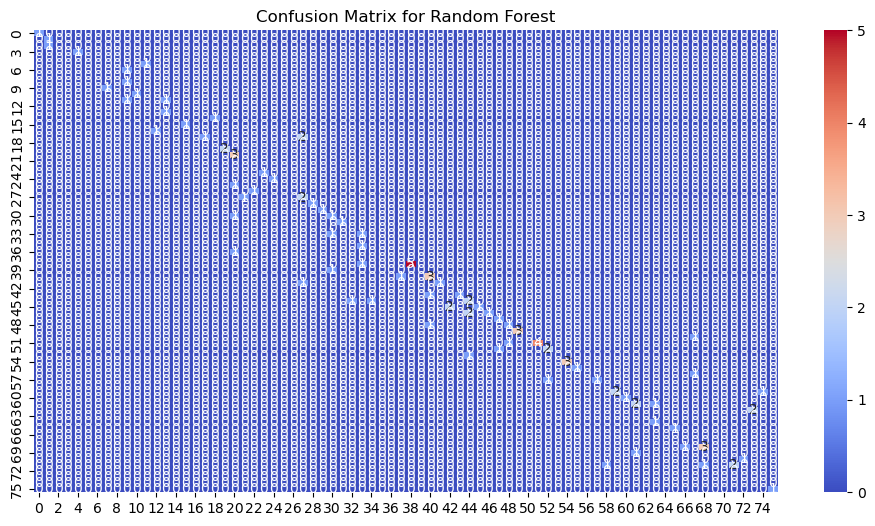

In [126]:
plt.figure(figsize = (12,6))
sns.heatmap(conf_matrix, annot = True, fmt= 'g', cmap = 'coolwarm')
plt.title('Confusion Matrix for Random Forest')

In [127]:
rfc.feature_importances_

array([0.16805635, 0.16353812, 0.06941601, 0.10091937, 0.05715266,
       0.01074403, 0.12654213, 0.16047333, 0.07148281, 0.0716752 ])

In [128]:
X.columns

Index(['Model', 'Colour', 'Memory', 'RAM', 'Battery_', 'AI Lens',
       'Mobile Height', 'Processor_', 'RearCameraMP', 'FrontCameraMP'],
      dtype='object')

In [129]:
pd.DataFrame(index = X.columns, data = rfc.feature_importances_, 
             columns = ['Feature Importance']).sort_values('Feature Importance', ascending = False)

,Feature Importance
Model,0.168056
Colour,0.163538
Processor_,0.160473
Mobile Height,0.126542
RAM,0.100919
FrontCameraMP,0.071675
RearCameraMP,0.071483
Memory,0.069416
Battery_,0.057153
AI Lens,0.010744


According to Random Forest, Model is the most important feature which affects the Price, followed by Colour, Processor and Mobile Height

# Gradient Boosting Classification

In [130]:
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report, confusion_matrix, mean_absolute_error
from sklearn.model_selection import GridSearchCV



In [131]:
gbc1 = GradientBoostingClassifier(n_estimators=200, max_depth=3)

In [132]:
gbc1.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=200)

In [133]:
pred_y = gbc1.predict(X_test)

In [134]:
confusion_matrix(y_test, pred_y)

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=int64)

In [135]:
accuracy_score(y_test, pred_y)

0.5596330275229358

In [136]:
gbc1.score(X_train, y_train)

0.9953703703703703

In [137]:
gbc1.score(X_test, y_test)

0.5596330275229358

Accuracy is 0.55

In [138]:
gbc1.feature_importances_

array([0.21545132, 0.21822671, 0.06772451, 0.10708806, 0.02691474,
       0.01007418, 0.07315539, 0.19370174, 0.05272524, 0.03493811])

In [139]:
X.columns

Index(['Model', 'Colour', 'Memory', 'RAM', 'Battery_', 'AI Lens',
       'Mobile Height', 'Processor_', 'RearCameraMP', 'FrontCameraMP'],
      dtype='object')

In [140]:
feature_imp = pd.DataFrame(index = X.columns, data = gbc1.feature_importances_,
            columns = ['Feature Importance']).sort_values('Feature Importance', ascending = False)

In [141]:
feature_imp

,Feature Importance
Colour,0.218227
Model,0.215451
Processor_,0.193702
RAM,0.107088
Mobile Height,0.073155
Memory,0.067725
RearCameraMP,0.052725
FrontCameraMP,0.034938
Battery_,0.026915
AI Lens,0.010074


Gradient Boosting Classifier shows that Model is the most relevant feature which affects the Price followed by Colour, Processor, RAM, Mobile Height and Memory

<Figure size 2000x1000 with 0 Axes>

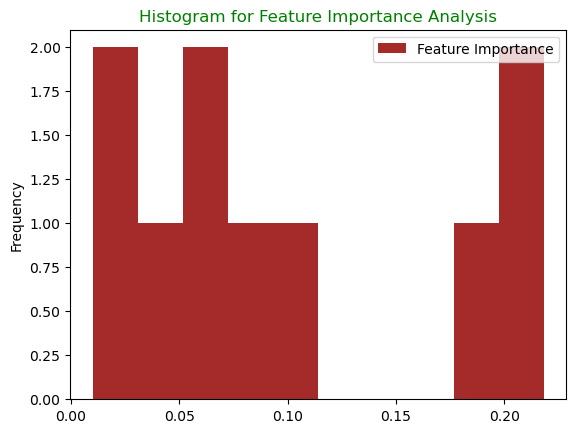

In [142]:
plt.figure(figsize = (10,5), dpi = 200)
feature_imp.plot(kind = 'hist', color = 'brown')
plt.title('Histogram for Feature Importance Analysis', color = 'green')
plt.show()


This histogram shows equal values for 2 most relevant features Model and Colour. After that it shows the values for RAM and Processor

In [143]:
#Changing Parameters
gbc2 = GradientBoostingClassifier(n_estimators=300, max_depth=5)

In [144]:
gbc2.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=5, n_estimators=300)

In [145]:
pred_y = gbc2.predict(X_test)

In [146]:
accuracy_score(y_test, pred_y)

0.6146788990825688

In [147]:
# accuracy score is different after changing parameters

# Gradient Boosting Regression

In [148]:
gbr1 = GradientBoostingRegressor(n_estimators=200, max_depth=3)

In [149]:
gbr1.fit(X_train, y_train)

GradientBoostingRegressor(n_estimators=200)

In [150]:
predictions = gbr1.predict(X_test)

In [151]:
mean_absolute_error(y_test, predictions)

1556.3622767913494

In [152]:
mean_squared_error(y_test, predictions)

7557410.774837884

In [153]:
# root mean squared error
np.sqrt(mean_squared_error(y_test, predictions))

2749.0745306080526

In [154]:
from sklearn.metrics import r2_score

In [155]:
r2_score(y_test, predictions)

0.89803002960132

Accuracy score is 0.90 which is highest among all other algorithms

In [156]:
gbr1.feature_importances_

array([1.97575388e-01, 2.04814609e-02, 1.40996270e-01, 2.83960120e-02,
       7.71056016e-02, 2.43665975e-04, 2.56350816e-02, 2.49187946e-02,
       2.23143953e-02, 4.62333329e-01])

In [157]:
X.columns

Index(['Model', 'Colour', 'Memory', 'RAM', 'Battery_', 'AI Lens',
       'Mobile Height', 'Processor_', 'RearCameraMP', 'FrontCameraMP'],
      dtype='object')

In [158]:
feature_importance = pd.DataFrame(index = X.columns, data = gbr1.feature_importances_,
            columns = ['Feature Importance']).sort_values('Feature Importance', ascending = False)

In [159]:
feature_importance

,Feature Importance
FrontCameraMP,0.462333
Model,0.197575
Memory,0.140996
Battery_,0.077106
RAM,0.028396
Mobile Height,0.025635
Processor_,0.024919
RearCameraMP,0.022314
Colour,0.020481
AI Lens,0.000244


We ll draw a JointPlot for this Feature Importance Analysis

C:\Users\Niti\OneDrive\Documents\Python Scripts\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Niti\OneDrive\Documents\Python Scripts\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Niti\OneDrive\Documents\Python Scripts\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Niti\OneDrive\Documents\Python Scripts\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed i

<Figure size 2400x1000 with 0 Axes>

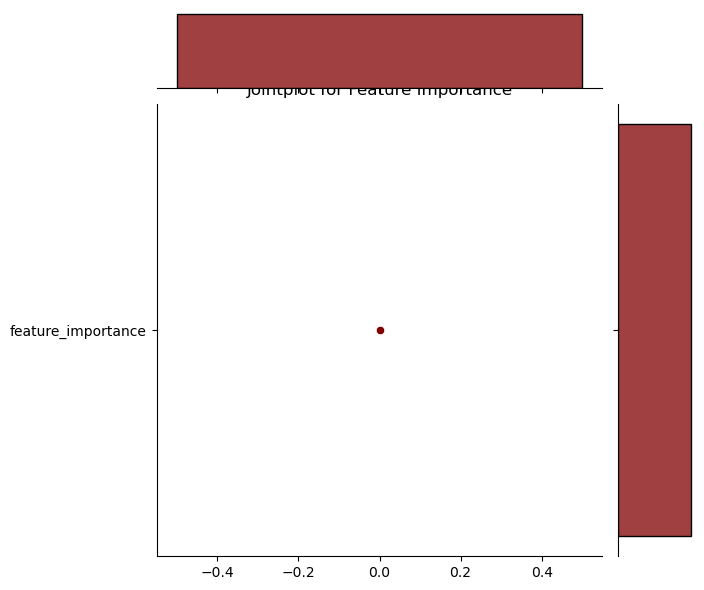

In [160]:
plt.figure(figsize = (12,5), dpi = 200)
sns.jointplot('feature_importance', color = 'maroon')
plt.title('Jointplot for Feature Importance')
plt.show()

This JointPlot shows a single point between all the positive and negative values which means this chart is centered for this algorithm

In [161]:
final_model = GradientBoostingRegressor(n_estimators=200, max_depth=3)

In [162]:
final_model.fit(X_train, y_train)

GradientBoostingRegressor(n_estimators=200)

# Model loading and final testing

In [163]:
from joblib import dump, load

In [164]:
dump(final_model, 'final_price_model.joblib')

['final_price_model.joblib']

In [165]:
loaded_model = load('final_price_model.joblib')

# Putting some values in all the features for testing purpose and calculating the Price

In [166]:
# 16 for Front Camera
# 69 for Model
# 256 for Memory
# 6000 for Battery
# 113 for Processor
# 16.76 for Mobile Height
# 8 for RAM
# 108 for Rear Camera
# 159 for Colour
# 1 for AI Lens

In [167]:
Mobile = [[16, 69, 256, 6000, 113, 16.76, 8, 108, 159, 1]]

In [168]:
loaded_model.predict(Mobile)

C:\Users\Niti\OneDrive\Documents\Python Scripts\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


array([15549.9010324])

# Price of the Mobile comes out to be 15,549 which is quite near to the mean price 16228

# Gradient Boosting Regression is the best algorithm for this data

Text(0.5, 1.0, 'Correlation Analysis of most relevant features')

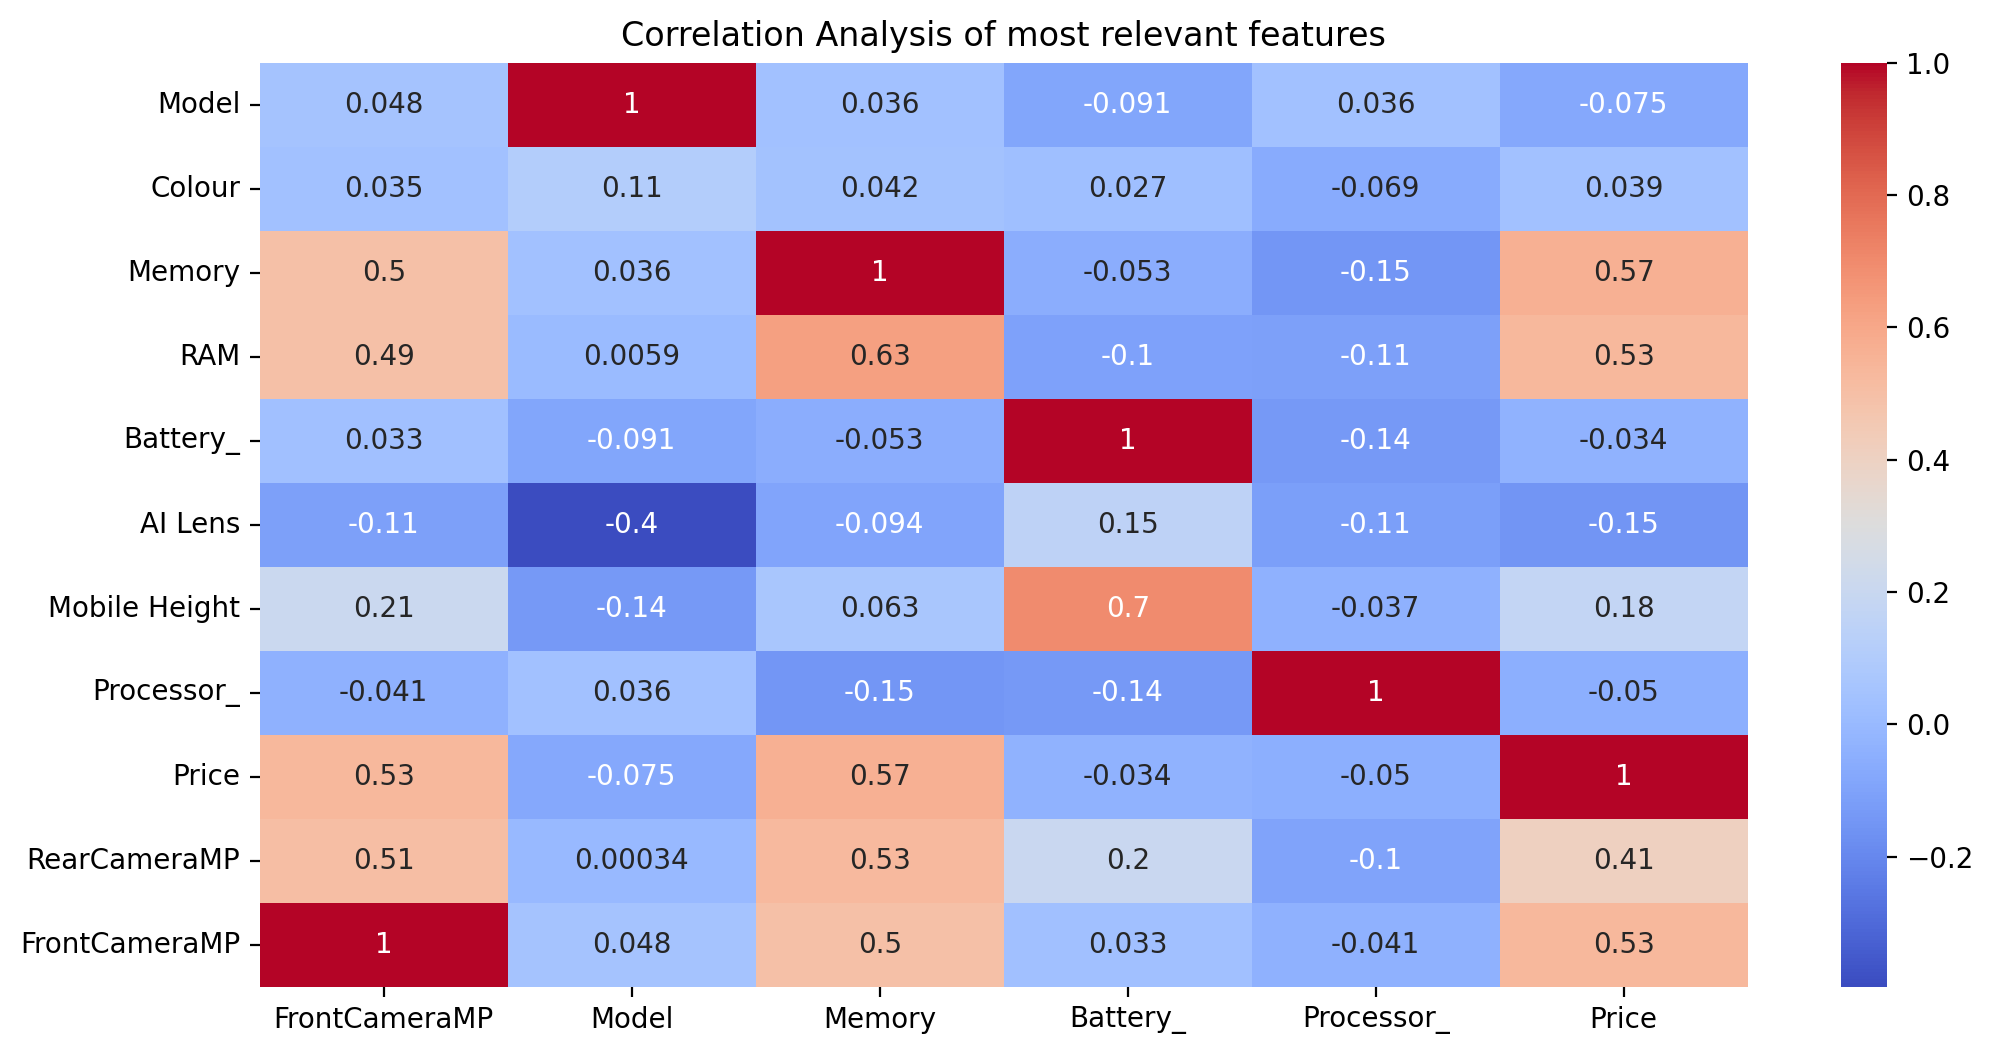

In [169]:
plt.figure(figsize = (12,6),dpi = 200)
sns.heatmap(df.corr()[['FrontCameraMP','Model','Memory','Battery_','Processor_','Price']], annot = True,cmap = 'coolwarm')
plt.title('Correlation Analysis of most relevant features')

# Most Relevant Correlation Analysis for this data


Front Camera, Model, Memory, Battery and then processor

Recommendations:
    Front Camera, Model and Memory have the most significant influence on mobile phone prices. This information can inform pricing strategies and marketing decisions.